In [4]:
import mysql.connector

# Establish a connection to the MySQL server
# Replace the placeholders with your actual MySQL connection details
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

# Close the connection when done
# connection.close()


Connected to MySQL database


In [5]:
import mysql.connector
import pandas as pd

# Establish a connection to the MySQL server
# Replace the placeholders with your actual MySQL connection details
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Execute a query to fetch data from MySQL
    query = "SELECT * FROM school_data_analysis LIMIT 5"  # Adjust your_table and any conditions as needed
    cursor = connection.cursor()
    cursor.execute(query)

    # Fetch all rows
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()

    # Convert the fetched data into a DataFrame
    df = pd.DataFrame(data, columns=[i[0] for i in cursor.description])

    # Print the first five rows
    print(df.head())
else:
    print("Failed to connect to MySQL database")


Connected to MySQL database
   id  Gender EthnicGroup          ParentEduc     LunchType  Test_Prep  \
0   0  female     group B   bachelor's degree      standard       none   
1   1  female     group C        some college      standard  completed   
2   2  female     group B     master's degree      standard       none   
3   3    male     group A  associate's degree  free/reduced       none   
4   4    male     group C        some college      standard       none   

  ParentMaritalStatus Practice_Sport IsFirstChild  Num_Siblings  \
0             married      regularly          yes             3   
1             married      sometimes          yes             0   
2              single      sometimes          yes             4   
3             married          never           no             1   
4             married      sometimes          yes             0   

  Transport_status  Math_Score  Reading_Score  Writing_Score  
0       school_bus          71             71             74 

In [7]:
import mysql.connector
import pandas as pd

# Establish a connection to the MySQL server
# Replace the placeholders with your actual MySQL connection details
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Execute a query to fetch data from MySQL
    query = "SELECT * FROM school_data_analysis ORDER BY Id DESC LIMIT 5"  # Replace 'column_name' with a suitable column
    cursor = connection.cursor()
    cursor.execute(query)

    # Fetch all rows
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()

    # Convert the fetched data into a DataFrame
    df = pd.DataFrame(data, columns=[i[0] for i in cursor.description])

    # Print the last five rows
    print(df)
else:
    print("Failed to connect to MySQL database")


Connected to MySQL database
    id  Gender EthnicGroup        ParentEduc     LunchType  Test_Prep  \
0  424    male     group C      some college  free/reduced       none   
1  423  female     group A  some high school      standard  completed   
2  422  female     group D   master's degree  free/reduced  completed   
3  421  female     group D       high school      standard  completed   
4  419    male     group E       high school  free/reduced  completed   

  ParentMaritalStatus Practice_Sport IsFirstChild  Num_Siblings  \
0             married      sometimes           no             2   
1             married      sometimes          yes             0   
2            divorced          never          yes             0   
3             married      regularly           no             2   
4             married      sometimes           no             3   

  Transport_status  Math_Score  Reading_Score  Writing_Score  
0          private          41             39             34  
1   

In [14]:
#Analyzing gender distribution by ethnic group:
import mysql.connector
import pandas as pd

# Connect to MySQL database
def connect_to_database():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Hema@1234",
            database="school_data_analysis"
        )
        if connection.is_connected():
            print("Connected to MySQL database")
            return connection
    except mysql.connector.Error as e:
        print("Error connecting to MySQL database:", e)
        return None

# Close database connection
def close_connection(connection):
    if connection:
        connection.close()
        print("Connection closed")

# Analyze gender distribution by ethnic group
def analyze_gender_distribution_by_ethnic_group(connection):
    try:
        cursor = connection.cursor()
        query = """
            SELECT EthnicGroup, Gender, COUNT(*) AS Count
            FROM school_data_analysis
            GROUP BY EthnicGroup, Gender
        """
        cursor.execute(query)
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=['EthnicGroup', 'Gender', 'Count'])
        print(df)
    except mysql.connector.Error as e:
        print("Error executing query:", e)

# Main function
def main():
    connection = connect_to_database()
    if connection:
        # Analyze gender distribution by ethnic group
        print("\nAnalyzing gender distribution by ethnic group:\n")
        analyze_gender_distribution_by_ethnic_group(connection)
        # Close connection
        close_connection(connection)

if __name__ == "__main__":
    main()



Connected to MySQL database

Analyzing gender distribution by ethnic group:

  EthnicGroup  Gender  Count
0     group B  female     45
1     group C  female     65
2     group A    male     23
3     group C    male     56
4     group B    male     38
5     group D    male     55
6     group A  female     10
7     group D  female     51
8     group E  female     23
9     group E    male     32
Connection closed


Connected to MySQL database
Connection closed


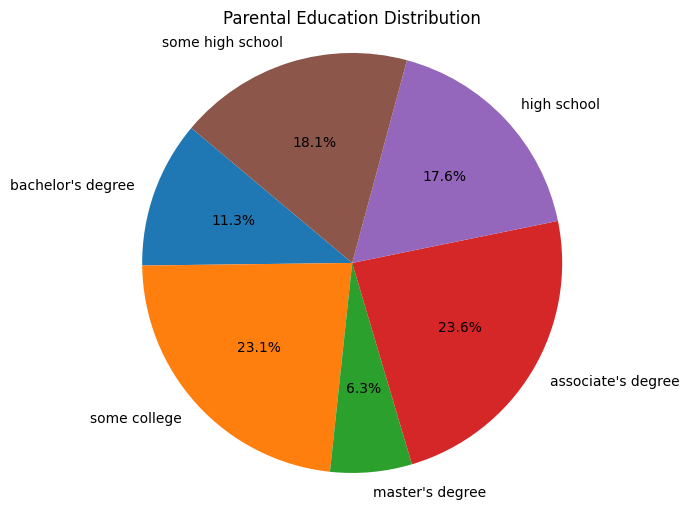

In [34]:
#Parental Education Distribution
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT ParentEduc, COUNT(*) AS Count FROM school_data_analysis GROUP BY ParentEduc"

    # Fetch data from MySQL database
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['ParentEduc', 'Count'])

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(df['Count'], labels=df['ParentEduc'], autopct='%1.1f%%', startangle=140)
    plt.title('Parental Education Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Connection failed")


Connected to MySQL database
Connection closed


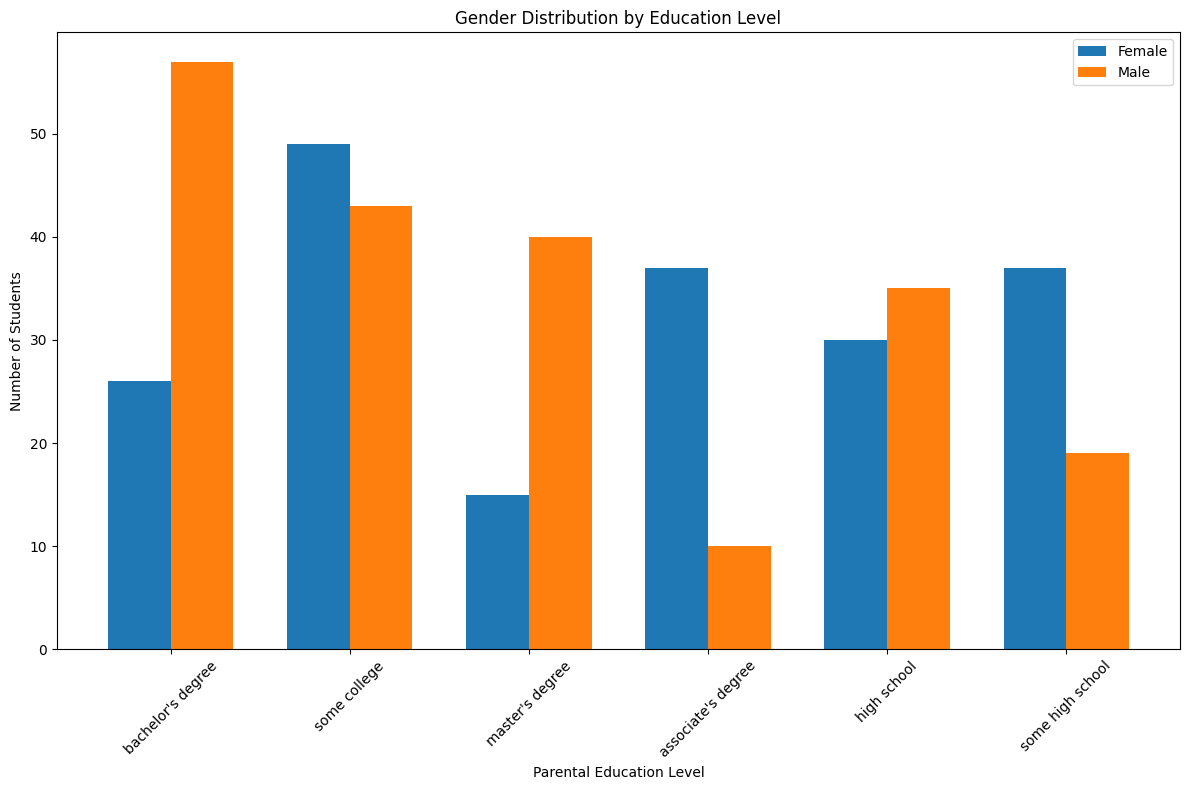

In [33]:
#Gender Distribution by Education Level
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT Gender, ParentEduc, COUNT(*) AS Count FROM school_data_analysis GROUP BY Gender, ParentEduc"

    # Fetch data from MySQL database
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['Gender', 'ParentEduc', 'Count'])

    # Plot side-by-side bar graph
    plt.figure(figsize=(12, 8))
    df_females = df[df['Gender'] == 'female']
    df_males = df[df['Gender'] == 'male']
    
    bar_width = 0.35
    index = range(len(df_females))
    
    plt.bar(index, df_females['Count'], bar_width, label='Female')
    plt.bar([i + bar_width for i in index], df_males['Count'], bar_width, label='Male')

    plt.xlabel('Parental Education Level')
    plt.ylabel('Number of Students')
    plt.title('Gender Distribution by Education Level')
    plt.xticks([i + bar_width / 2 for i in index], df_females['ParentEduc'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Connection failed")


In [21]:
import mysql.connector

# Connect to MySQL database
def connect_to_database():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Hema@1234",
            database="school_data_analysis"
        )
        if connection.is_connected():
            print("Connected to MySQL database")
            return connection
    except mysql.connector.Error as e:
        print("Error connecting to MySQL database:", e)
        return None

# Close database connection
def close_connection(connection):
    if connection:
        connection.close()
        print("Connection closed")

# Get column names from the dataset
def get_column_names(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM school_data_analysis LIMIT 1")
        column_names = [i[0] for i in cursor.description]
        return column_names
    except mysql.connector.Error as e:
        print("Error getting column names:", e)
        return None

# Main function
def main():
    connection = connect_to_database()
    if connection:
        # Get column names from the dataset
        column_names = get_column_names(connection)
        if column_names:
            print("Columns in the dataset:", column_names)
        # Close connection
        close_connection(connection)

if __name__ == "__main__":
    main()


Connected to MySQL database
Columns in the dataset: ['id', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'Test_Prep', 'ParentMaritalStatus', 'Practice_Sport', 'IsFirstChild', 'Num_Siblings', 'Transport_status', 'Math_Score', 'Reading_Score', 'Writing_Score']
Connection closed


In [23]:
#Number of students practicing sports regularly
import mysql.connector

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT COUNT(*) FROM school_data_analysis WHERE Practice_Sport = 'regularly'"

    # Execute the query
    cursor = connection.cursor()
    cursor.execute(query)

    # Fetch the result
    count = cursor.fetchone()[0]

    # Print the count
    print("Number of students practicing sports regularly:", count)

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")
else:
    print("Connection failed")


Connected to MySQL database
Number of students practicing sports regularly: 152
Connection closed


In [24]:
#Average Math Score among students
#Average Reading Score among students
import mysql.connector

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL queries
    math_score_query = "SELECT AVG(Math_Score) FROM school_data_analysis"
    reading_score_query = "SELECT AVG(Reading_Score) FROM school_data_analysis"

    # Execute the queries for average math score and average reading score
    cursor = connection.cursor()
    cursor.execute(math_score_query)
    average_math_score = cursor.fetchone()[0]

    cursor.execute(reading_score_query)
    average_reading_score = cursor.fetchone()[0]

    # Print the results
    print("Average Math Score among students:", average_math_score)
    print("Average Reading Score among students:", average_reading_score)

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")
else:
    print("Connection failed")


Connected to MySQL database
Average Math Score among students: 65.1307
Average Reading Score among students: 67.9950
Connection closed


In [25]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

Connected to MySQL database
Connection closed


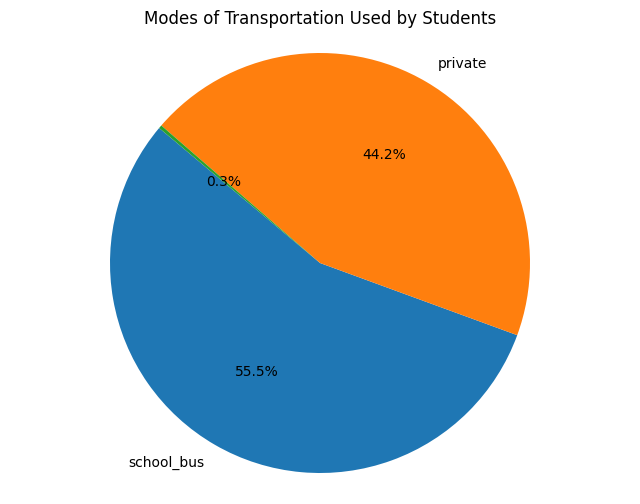

In [26]:
#Modes of Transportation Used by Students
# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT Transport_status, COUNT(*) AS Count FROM school_data_analysis GROUP BY Transport_status"

    # Fetch data from MySQL database
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['Transport_status', 'Count'])

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(df['Count'], labels=df['Transport_status'], autopct='%1.1f%%', startangle=140)
    plt.title('Modes of Transportation Used by Students')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Connection failed")

Connected to MySQL database
Connection closed


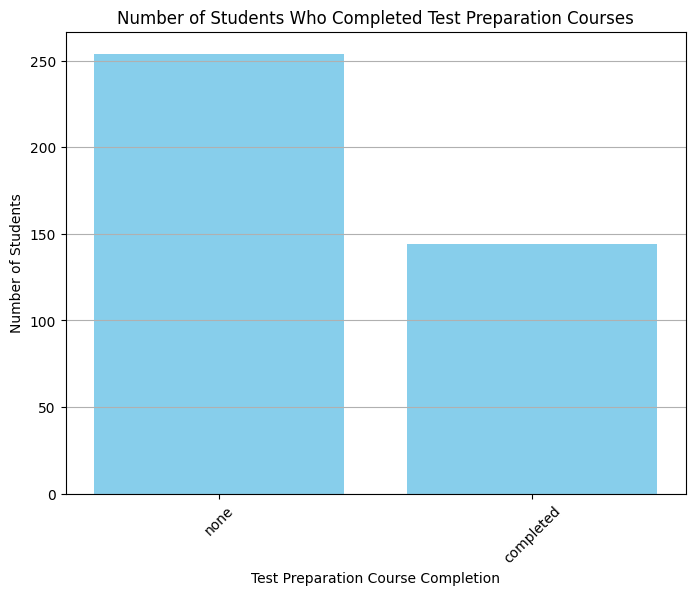

In [28]:
#Number of Students Who Completed Test Preparation Courses
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)
# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT Test_Prep, COUNT(*) AS Count FROM school_data_analysis GROUP BY Test_Prep"

    # Fetch data from MySQL database
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['Test_Prep', 'Count'])

    # Plot bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(df['Test_Prep'], df['Count'], color='skyblue')
    plt.xlabel('Test Preparation Course Completion')
    plt.ylabel('Number of Students')
    plt.title('Number of Students Who Completed Test Preparation Courses')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("Connection failed")

Connected to MySQL database
Connection closed


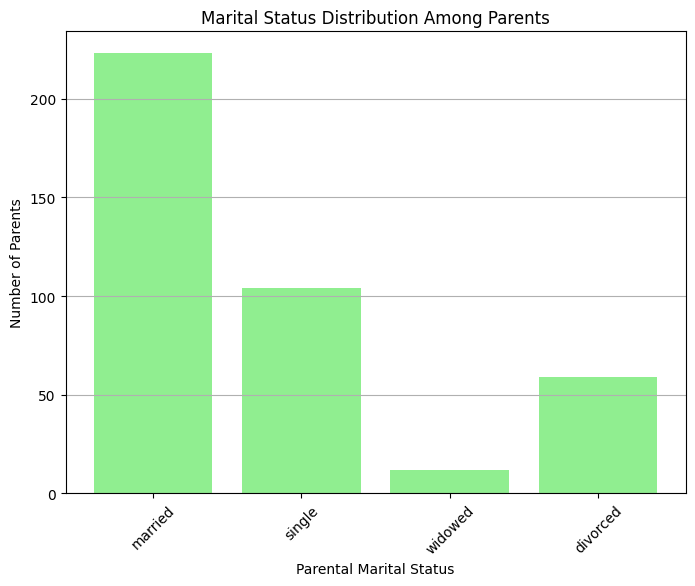

In [29]:
#Marital Status Distribution Among Parents
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT ParentMaritalStatus, COUNT(*) AS Count FROM school_data_analysis GROUP BY ParentMaritalStatus"

    # Fetch data from MySQL database
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['ParentMaritalStatus', 'Count'])

    # Plot bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(df['ParentMaritalStatus'], df['Count'], color='lightgreen')
    plt.xlabel('Parental Marital Status')
    plt.ylabel('Number of Parents')
    plt.title('Marital Status Distribution Among Parents')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("Connection failed")


Connected to MySQL database
Connection closed


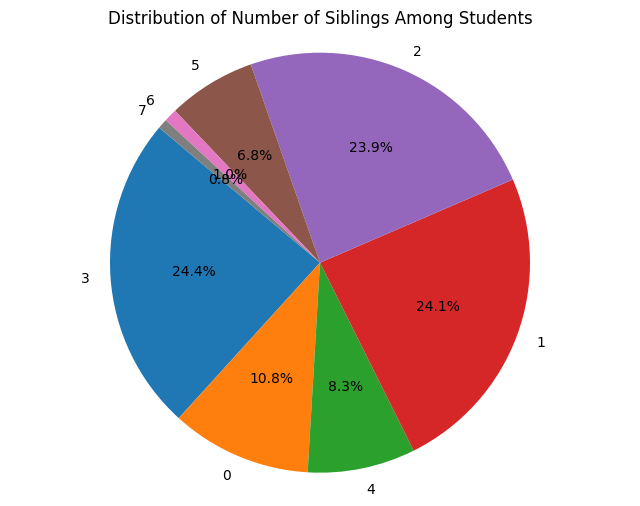

In [30]:
#Distribution of Number of Siblings Among Students
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hema@1234",
    database="school_data_analysis"
)

# Check if the connection was successful
if connection.is_connected():
    print("Connected to MySQL database")

    # Define the SQL query
    query = "SELECT Num_Siblings, COUNT(*) AS Count FROM school_data_analysis GROUP BY Num_Siblings"

    # Fetch data from MySQL database
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed")

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['Num_Siblings', 'Count'])

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(df['Count'], labels=df['Num_Siblings'], autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Number of Siblings Among Students')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Connection failed")
